## <font color=purple>Importing various libraries</font>


In [38]:
# Libraries to work with the data object
import pandas as pd 
import numpy as np
import math 

# libraries to visualize
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# sklearn as one of the most used machine learning package
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from scipy import stats

## <font color= purple>Load and process the dataset</font>


In [39]:
path = "customer_data_sample.csv"
data=pd.read_csv(path, sep=',') #data separated with commas 

In [40]:
data.head(50)

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
5,15006,0,13,male,NaN,0,0,16.9166,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Turku
6,15007,0,11,male,54.0,0,0,103.7250,68781db29be014199a40a50d93c5f1595dde7ca164c5b0...,Helsinki
7,15008,0,13,male,2.0,3,1,42.1500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
8,15009,1,13,female,27.0,0,2,22.2666,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
9,15010,1,12,female,14.0,1,0,60.1416,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Tampere


## <font color= purple>Understanding and cleaning of the data</font>


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        891 non-null    int64  
 1   converted          891 non-null    int64  
 2   customer_segment   891 non-null    int64  
 3   gender             891 non-null    object 
 4   age                714 non-null    float64
 5   related_customers  891 non-null    int64  
 6   family_size        891 non-null    int64  
 7   initial_fee_level  891 non-null    float64
 8   credit_account_id  891 non-null    object 
 9   branch             889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


I see that data has 891 entries
I see that it consists of integers, objects and float types
I do not think it makes sense to have for an example age as a float, since it is very rare to count that number in halfs. Maybe in special cases though. 

In [42]:
#i am checking for NaN values
data.isnull().values.any()
data.isnull().sum().sum()

179

In [43]:
#Found 179 N/A values, which I remove. I also have the opportunity to calculate average if it 
#is in compliance witht the business requirements, but for not i will remove them.

#first checking where the NaN values are.

is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

In [44]:
print(rows_with_NaN)

     customer_id  converted  customer_segment  gender  age  related_customers  \
5          15006          0                13    male  NaN                  0   
17         15018          1                12    male  NaN                  0   
19         15020          1                13  female  NaN                  0   
26         15027          0                13    male  NaN                  0   
28         15029          1                13  female  NaN                  0   
..           ...        ...               ...     ...  ...                ...   
859        15860          0                13    male  NaN                  0   
863        15864          0                13  female  NaN                  8   
868        15869          0                13    male  NaN                  0   
878        15879          0                13    male  NaN                  0   
888        15889          0                13  female  NaN                  1   

     family_size  initial_f

In [45]:
#I see that the NaN values primarily comes from the column 'age'.
#Since we do not know at the moment how age correlates to if the customer has converted or not
#i decide to replace the NaN with an average age. 
#I do this because I think it is better than removing a big portion of the entries, since the dataset is not 
#very big itself with 891 entries.

In [46]:
data['age'].fillna(value=data['age'].mean(), inplace=True)

In [47]:
#to doublecheck that the customer id which had NaN before now has average age
data[data["customer_id"] == 15030]


,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
29,15030,0,13,male,29.699118,0,0,15.7916,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki


In [48]:
#I see that it did its job - the entry now has the mean age and is not NaN. 

In [49]:
#i am checking for other NaN values
data.isnull().values.any()
data.isnull().sum().sum()

2

In [50]:
#I see that there is only 2 NaN values left. 

is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
print(rows_with_NaN)

     customer_id  converted  customer_segment  gender   age  \
61         15062          1                11  female  38.0   
829        15830          1                11  female  62.0   

     related_customers  family_size  initial_fee_level  \
61                   0            0              160.0   
829                  0            0              160.0   

                                     credit_account_id branch  
61   8abdf1580603d91a8e255690a4b7381a36aff7b0c4c0c6...    NaN  
829  8abdf1580603d91a8e255690a4b7381a36aff7b0c4c0c6...    NaN  


In [51]:
#Since it is the branch (location) missing and it is only 2 entries, i decide to remove these and save in new dataframe.
data_new = data.dropna()

In [52]:
#checking numbers of entries and it worked!!
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        889 non-null    int64  
 1   converted          889 non-null    int64  
 2   customer_segment   889 non-null    int64  
 3   gender             889 non-null    object 
 4   age                889 non-null    float64
 5   related_customers  889 non-null    int64  
 6   family_size        889 non-null    int64  
 7   initial_fee_level  889 non-null    float64
 8   credit_account_id  889 non-null    object 
 9   branch             889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


In [53]:
#i am doublechecking for NaN values on the new dataframe 
data_new.isnull().values.any()
data_new.isnull().sum().sum()

0

## <font color= purple>Basic statistics</font>


In [54]:
data_new.describe()

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,15446.000000,0.382452,12.311586,29.653446,0.524184,0.382452,64.193362
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,99.395009
min,15001.000000,0.000000,11.000000,0.420000,0.000000,0.000000,0.000000
25%,15224.000000,0.000000,12.000000,22.000000,0.000000,0.000000,15.791600
50%,15446.000000,0.000000,13.000000,29.699118,0.000000,0.000000,28.908400
75%,15668.000000,1.000000,13.000000,35.000000,1.000000,0.000000,62.000000
max,15891.000000,1.000000,13.000000,80.000000,8.000000,6.000000,1024.658400


Here i see some statistics - for an example average age is 29 years old. 
Besides that I see some statistics in upper and lower quantile. Here the related_customers, family size, initial_fee_level is interesting.

I also here check if i think the column names and types make sense. If for an example the names of the columns are more precise with other names I would change them now.

In [55]:
data['customer_segment'].unique()

array([13, 11, 12])

In [56]:
#I see that the mean of the customer_segment is 12,3 but the 50% quantile and upper quantile 75% are 13, which means
#that a big portion of the customer segment is heavier on the 12 and 13 than the 11 segment.

#here i am filtering on all entries where customer_segment is 13.
data_new.loc[data['customer_segment'] == 13].describe() 

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level
count,491.000000,491.000000,491.0,491.000000,491.000000,491.000000,491.000000
mean,15439.154786,0.242363,13.0,26.403259,0.615071,0.393075,27.351100
std,264.441453,0.428949,0.0,10.815245,1.374883,0.888861,23.556283
min,15001.000000,0.000000,13.0,0.420000,0.000000,0.000000,0.000000
25%,15200.000000,0.000000,13.0,20.250000,0.000000,0.000000,15.500000
50%,15432.000000,0.000000,13.0,29.699118,0.000000,0.000000,16.100000
75%,15666.500000,0.000000,13.0,29.699118,1.000000,0.000000,31.000000
max,15891.000000,1.000000,13.0,74.000000,8.000000,6.000000,139.100000


In [57]:
#I think it would be interesting to see if the age mean differs between segments

data_new.loc[data['customer_segment'] == 12].describe() 

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level
count,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000
mean,15445.956522,0.472826,12.0,29.866958,0.402174,0.380435,41.324366
std,250.852161,0.500623,0.0,13.573825,0.601633,0.690963,26.834798
min,15010.000000,0.000000,12.0,0.670000,0.000000,0.000000,0.000000
25%,15234.500000,0.000000,12.0,23.000000,0.000000,0.000000,26.000000
50%,15435.500000,0.000000,12.0,29.699118,0.000000,0.000000,28.500000
75%,15668.000000,1.000000,12.0,36.000000,1.000000,1.000000,52.000000
max,15887.000000,1.000000,12.0,70.000000,3.000000,3.000000,147.000000


In [58]:
data_new.loc[data['customer_segment'] == 11].describe() 

,customer_id,converted,customer_segment,age,related_customers,family_size,initial_fee_level
count,214.000000,214.000000,214.0,214.000000,214.000000,214.000000,214.000000
mean,15461.742991,0.626168,11.0,36.927073,0.420561,0.359813,168.387033
std,245.080028,0.484954,0.0,14.007537,0.613424,0.696384,157.492914
min,15002.000000,0.000000,11.0,0.920000,0.000000,0.000000,0.000000
25%,15271.750000,0.000000,11.0,29.000000,0.000000,0.000000,61.543700
50%,15472.000000,1.000000,11.0,35.000000,0.000000,0.000000,117.379200
75%,15668.250000,1.000000,11.0,47.000000,1.000000,0.000000,187.000000
max,15890.000000,1.000000,11.0,80.000000,3.000000,4.000000,1024.658400


In [59]:
#from these calculations i see that age differs between segments.
#segment 13 has mean age at 26,4
#segment 12 has mean age at 29,8
#segment 13 has mean age at 36,9

#Some thoughts I have as well is:
#- look like the minimum age is app. 0 - does it make sense?
#I assume that the reason why these ages are so low is because the dataset consists of all family members and not
#only clients that uses the product. 

#we can check if any of the age of 0-10 years entries have family size of 0, which I assume means an individual person
#and would not make sense then.

print(data_new['family_size'].where(data_new['age'] < 10.0))


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: family_size, Length: 889, dtype: float64


In [60]:
#the dataset has no entries where family size is 0 and age under 5 years
((data_new['family_size'] == 0) & (data_new['age'] < 5)).any()



False

In [61]:
#the dataset have entries where family size is 0 and age under 6 years, which means between 5 and 6.

((data_new['family_size'] == 0) & (data_new['age'] < 6)).any()

True

In [62]:
#Since I do not know the true content of what the dataset exists of, I will leave this for now.

## <font color= purple>Case understanding</font>


In [63]:
#Since my task is to figure out: "What are the most important factors for 
#predicting whether a customer has converted or not?"

#I then conclude that we can drop some columns that wont help in answer this question.

In [64]:
data_new.columns

Index(['customer_id', 'converted', 'customer_segment', 'gender', 'age',
       'related_customers', 'family_size', 'initial_fee_level',
       'credit_account_id', 'branch'],
      dtype='object')

In [65]:
#my first assumption is that i can remove the column credit_account_id 

data_new.drop(['credit_account_id'], axis=1, inplace=True)

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
data_new.columns

Index(['customer_id', 'converted', 'customer_segment', 'gender', 'age',
       'related_customers', 'family_size', 'initial_fee_level', 'branch'],
      dtype='object')

In [67]:
data_new.dtypes

customer_id            int64
converted              int64
customer_segment       int64
gender                object
age                  float64
related_customers      int64
family_size            int64
initial_fee_level    float64
branch                object
dtype: object

In [68]:
#converting the following
#Helsinki = 0
#Tampere = 1
#Turku = 2

data_new['branch'].unique()

array(['Helsinki', 'Tampere', 'Turku'], dtype=object)

In [69]:
Geography = pd.get_dummies(data_new.branch).iloc[:,1:]

#encoded = pd.get_dummies(data_new["branch"])
#encoded

In [70]:
result = pd.concat([data_new, Geography], axis=1)

In [71]:
result.head(5)

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,branch,Tampere,Turku
0,15001,0,13,male,22.0,1,0,14.5000,Helsinki,0,0
1,15002,1,11,female,38.0,1,0,142.5666,Tampere,1,0
2,15003,1,13,female,26.0,0,0,15.8500,Helsinki,0,0
3,15004,1,11,female,35.0,1,0,106.2000,Helsinki,0,0
4,15005,0,13,male,35.0,0,0,16.1000,Helsinki,0,0


In [72]:
#now i can drop the column 'branch'
result.drop(['branch'], axis=1, inplace=True)

In [73]:
result.head(5)

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,Tampere,Turku
0,15001,0,13,male,22.0,1,0,14.5000,0,0
1,15002,1,11,female,38.0,1,0,142.5666,1,0
2,15003,1,13,female,26.0,0,0,15.8500,0,0
3,15004,1,11,female,35.0,1,0,106.2000,0,0
4,15005,0,13,male,35.0,0,0,16.1000,0,0


In [74]:
data = result

In [75]:
#converting from float to int

data['age'] = data['age'].astype(int)
data['initial_fee_level'] = data['initial_fee_level'].astype(int)

In [76]:
#converting gender to boolean

data.replace({'gender': {'male': 1, 'female': 0}},inplace=True)



In [77]:
data.head(5)

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,Tampere,Turku
0,15001,0,13,1,22,1,0,14,0,0
1,15002,1,11,0,38,1,0,142,1,0
2,15003,1,13,0,26,0,0,15,0,0
3,15004,1,11,0,35,1,0,106,0,0
4,15005,0,13,1,35,0,0,16,0,0


In [78]:
data.dtypes

customer_id          int64
converted            int64
customer_segment     int64
gender               int64
age                  int64
related_customers    int64
family_size          int64
initial_fee_level    int64
Tampere              uint8
Turku                uint8
dtype: object

## <font color= purple>Outliers</font>


In [79]:
#Even though i said that i do not know the data domain good enough for this task and would not touch the low
#ages, i am still interested in the outliers in the dataset.

data['age'].describe()## <font color= purple>Load and process the dataset</font>

count    889.000000
mean      29.498313
std       12.979638
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

<AxesSubplot:>

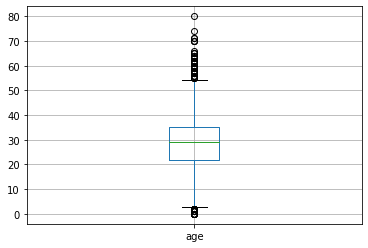

In [80]:
#as you can see there are a lot of outliers in age. Therefore i imagine that the data is based on people in between Q1 and Q3
#which are the ages from approx 22-35 years. And maybe the outliers are their kids and parents/grand in the data.
#since we do not know what exactly "converted" means, but since the q1 and q3 are between the ages of 22-35
#i think we can remove the outliers if we need to see true relations in that age if they have converted to 
#a new product or not.

data.boxplot('age')

In [81]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
print (IQR)

13.0


In [82]:
criteria1 = (data['age'] <= Q1 - 1.5 * IQR) | (data['age'] > Q3 + 1.5 *IQR) 
outliers1 = data.loc[criteria1]
print("These are the outliers based on their age:\n")
print(outliers1)

These are the outliers based on their age:

     customer_id  converted  customer_segment  gender  age  related_customers  \
7          15008          0                13       1    2                  3   
11         15012          1                11       0   58                  0   
15         15016          1                12       0   55                  0   
16         15017          0                13       1    2                  4   
33         15034          0                12       1   66                  0   
..           ...        ...               ...     ...  ...                ...   
824        15825          0                13       1    2                  4   
827        15828          1                12       1    1                  0   
831        15832          1                12       1    0                  1   
851        15852          0                13       1   74                  0   
879        15880          1                11       0   56       

In [83]:
data.drop(outliers1.index, inplace=True)


<AxesSubplot:>

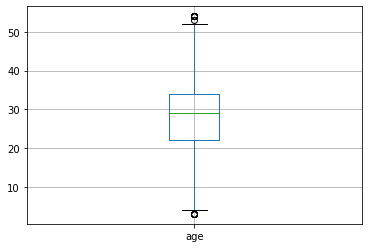

In [84]:
data.boxplot('age')

In [85]:
#now we see, that the stats have changed!! And that we went from 889 to 824 entries. 

data['age'].describe()

count    824.000000
mean      28.708738
std       10.172993
min        3.000000
25%       22.000000
50%       29.000000
75%       34.000000
max       54.000000
Name: age, dtype: float64

In [86]:
#I do not see any reason to delete outliers in other columns.

In [87]:
#now all the data is in integer form, and i can start working on the next modelling and visualizations part.

## <font color= purple>Modelling</font>


First i want to find correlations between the different fields/columns

Question: "What are the most important factors for 
#predicting whether a customer has converted or not?"

In [88]:
#I want to see any obvious correlations based on it converted or not

data.head()

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,Tampere,Turku
0,15001,0,13,1,22,1,0,14,0,0
1,15002,1,11,0,38,1,0,142,1,0
2,15003,1,13,0,26,0,0,15,0,0
3,15004,1,11,0,35,1,0,106,0,0
4,15005,0,13,1,35,0,0,16,0,0


In [89]:
data.columns

Index(['customer_id', 'converted', 'customer_segment', 'gender', 'age',
       'related_customers', 'family_size', 'initial_fee_level', 'Tampere',
       'Turku'],
      dtype='object')

In [90]:
#i drop the customer_id since it does not say anything about converted or not

data_mod = data.drop(['customer_id'], axis=1)

In [91]:
data_mod.columns

Index(['converted', 'customer_segment', 'gender', 'age', 'related_customers',
       'family_size', 'initial_fee_level', 'Tampere', 'Turku'],
      dtype='object')

In [92]:
#preparing the data for modelling prediction

X =  data_mod.drop(['converted'], axis=1)
y = data_mod['converted']

In [93]:
#dividing the test data into a set consist of 20% of total data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [94]:
#Now i will look for trends in data and train the model, which might can be used later for prediction
#to keep it simple i will use random forest algorithm for this classification purpose

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        91
           1       0.82      0.74      0.78        74

    accuracy                           0.81       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.81      0.81      0.81       165

0.8121212121212121


In [96]:
#our model has a accuracy of 81 % which is pretty good at first try

In [97]:
#To see what factors impacts the convertion most, i will use the Random Forest Classifier with the attribute feature
#importance to see which factors influences the convertion most.

<AxesSubplot:>

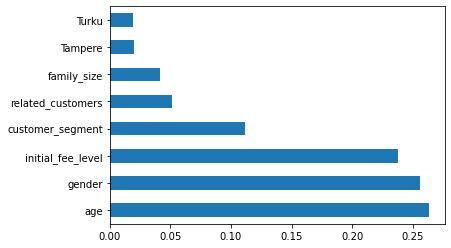

In [98]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [99]:
#Based on this data, we can see that age has the highest impact on convertion, followed by a customer's gender and the initial_fee_level.
#Assuming that 1 = True (the customer did convert to new product) in the convertion column and that 0 means "not converted"

## <font color= purple>Conclusion</font>

I included some basics statistics, some outlier visualizations and some data cleaning in order to answer the case question.

I created a machine learning model that's able to predict customer convertion with an accuracy of 81%. And answered the question: "What are the most important factors for predicting whether a customer has converted or not?" through a barplot, where factors that impacts the customer's convertion highest, is age followed by a customer's gender and the initial_fee_level.

//Stine Schou Rasmussen, 160222